In [4]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

import opendatasets as opd

In [12]:
opd.download('https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: pasinduchinthana12
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/dineshpiyasamara/cats-and-dogs-for-classification


100%|██████████| 217M/217M [00:02<00:00, 81.3MB/s]


In [13]:
BATCH_SIZE = 32
IMAGE_SIZE =(128,128)

In [14]:
train_data_dir = '/content/cats-and-dogs-for-classification/cats_dogs/train'
test_data_dir = '/content/cats-and-dogs-for-classification/cats_dogs/test'

In [15]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,batch_size = BATCH_SIZE,image_size= IMAGE_SIZE,subset ='training',validation_split =0.1,seed =42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,batch_size = BATCH_SIZE,image_size= IMAGE_SIZE,subset ='validation',validation_split =0.1,seed =42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,batch_size = BATCH_SIZE,image_size= IMAGE_SIZE)



Found 8000 files belonging to 2 classes.
Using 7200 files for training.
Found 8000 files belonging to 2 classes.
Using 800 files for validation.
Found 2000 files belonging to 2 classes.


In [16]:
class_names = train_data.class_names
class_names

['cats', 'dogs']

In [17]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


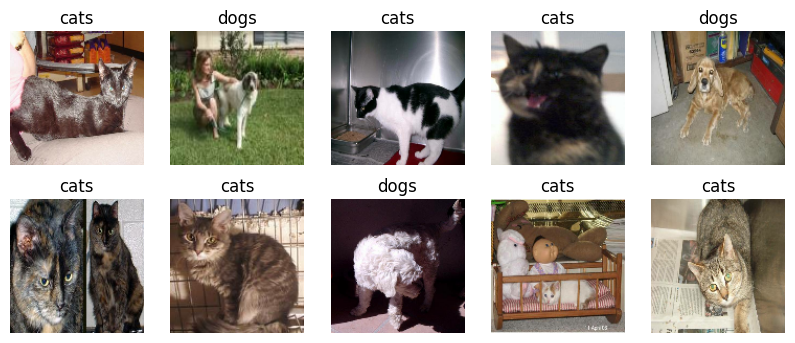

In [18]:
plt.figure(figsize =(10,4))

for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [19]:
 for image.label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[2.51042114e+02 2.51042114e+02 2.49042114e+02]
   [2.53347656e+02 2.54347656e+02 2.49000000e+02]
   [2.51683228e+02 2.52683228e+02 2.46191040e+02]
   ...
   [1.22000000e+02 6.90000000e+01 2.70000000e+01]
   [1.20347656e+02 6.73476562e+01 2.53476562e+01]
   [1.18898438e+02 6.90000000e+01 2.60000000e+01]]

  [[2.51000000e+02 2.51000000e+02 2.49000000e+02]
   [2.51281250e+02 2.52281250e+02 2.46933594e+02]
   [2.51281250e+02 2.52281250e+02 2.45789062e+02]
   ...
   [1.22000000e+02 6.90000000e+01 2.70000000e+01]
   [1.20347656e+02 6.73476562e+01 2.53476562e+01]
   [1.19898438e+02 7.00000000e+01 2.70000000e+01]]

  [[2.51000000e+02 2.51000000e+02 2.49000000e+02]
   [2.49000000e+02 2.50000000e+02 2.44652344e+02]
   [2.46714844e+02 2.47714844e+02 2.41222656e+02]
   ...
   [1.22000000e+02 6.90000000e+01 2.70000000e+01]
   [1.20347656e+02 6.73476562e+01 2.53476562e+01]
   [1.20898438e+02 7.10000000e+01 2.80000000e+01]]

  ...

  [[1.77664185e+02 1.62948242e+02 1.54186890e+02]
   [1

In [20]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [21]:
 for image.label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[2.51042114e+02 2.51042114e+02 2.49042114e+02]
   [2.53347656e+02 2.54347656e+02 2.49000000e+02]
   [2.51683228e+02 2.52683228e+02 2.46191040e+02]
   ...
   [1.22000000e+02 6.90000000e+01 2.70000000e+01]
   [1.20347656e+02 6.73476562e+01 2.53476562e+01]
   [1.18898438e+02 6.90000000e+01 2.60000000e+01]]

  [[2.51000000e+02 2.51000000e+02 2.49000000e+02]
   [2.51281250e+02 2.52281250e+02 2.46933594e+02]
   [2.51281250e+02 2.52281250e+02 2.45789062e+02]
   ...
   [1.22000000e+02 6.90000000e+01 2.70000000e+01]
   [1.20347656e+02 6.73476562e+01 2.53476562e+01]
   [1.19898438e+02 7.00000000e+01 2.70000000e+01]]

  [[2.51000000e+02 2.51000000e+02 2.49000000e+02]
   [2.49000000e+02 2.50000000e+02 2.44652344e+02]
   [2.46714844e+02 2.47714844e+02 2.41222656e+02]
   ...
   [1.22000000e+02 6.90000000e+01 2.70000000e+01]
   [1.20347656e+02 6.73476562e+01 2.53476562e+01]
   [1.20898438e+02 7.10000000e+01 2.80000000e+01]]

  ...

  [[1.77664185e+02 1.62948242e+02 1.54186890e+02]
   [1

In [23]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal',input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

In [25]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)      

In [27]:
model.compile(optimizer= tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [28]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=20,
                    validation_data =validation_data)

end_time = time.time()

Epoch 1/20
225/225 [==============================] - 18s 45ms/step - loss: 0.6740 - accuracy: 0.5921 - val_loss: 0.6593 - val_accuracy: 0.6737
Epoch 2/20
225/225 [==============================] - 9s 37ms/step - loss: 0.6431 - accuracy: 0.6319 - val_loss: 0.6666 - val_accuracy: 0.5775
Epoch 3/20
225/225 [==============================] - 13s 56ms/step - loss: 0.6332 - accuracy: 0.6363 - val_loss: 1.0137 - val_accuracy: 0.5562
Epoch 4/20
225/225 [==============================] - 10s 45ms/step - loss: 0.6087 - accuracy: 0.6557 - val_loss: 0.5551 - val_accuracy: 0.7188
Epoch 5/20
225/225 [==============================] - 10s 42ms/step - loss: 0.5907 - accuracy: 0.6819 - val_loss: 0.6031 - val_accuracy: 0.6175
Epoch 6/20
225/225 [==============================] - 9s 40ms/step - loss: 0.5707 - accuracy: 0.7001 - val_loss: 0.6299 - val_accuracy: 0.6125
Epoch 7/20
225/225 [==============================] - 9s 39ms/step - loss: 0.5553 - accuracy: 0.7179 - val_loss: 0.5408 - val_accuracy: 0.

In [29]:
history.history

{'loss': [0.6739917397499084,
  0.6431223154067993,
  0.6331783533096313,
  0.6087117791175842,
  0.5906663537025452,
  0.5707348585128784,
  0.555319607257843,
  0.5523185133934021,
  0.5385699272155762,
  0.524228572845459,
  0.5132609605789185,
  0.504746675491333,
  0.5019544363021851,
  0.48457610607147217,
  0.47450241446495056,
  0.4693540930747986,
  0.4626106023788452,
  0.4462878704071045,
  0.4426720142364502,
  0.4341382086277008],
 'accuracy': [0.5920833349227905,
  0.6319444179534912,
  0.6362500190734863,
  0.6556944251060486,
  0.6819444298744202,
  0.7001388669013977,
  0.7179166674613953,
  0.7170833349227905,
  0.7295833230018616,
  0.7395833134651184,
  0.7481944561004639,
  0.7501388788223267,
  0.7549999952316284,
  0.7643055319786072,
  0.773472249507904,
  0.7770833373069763,
  0.778333306312561,
  0.7859722375869751,
  0.7866666913032532,
  0.7955555319786072],
 'val_loss': [0.6593194007873535,
  0.6665807366371155,
  1.0136831998825073,
  0.5550836324691772,
 

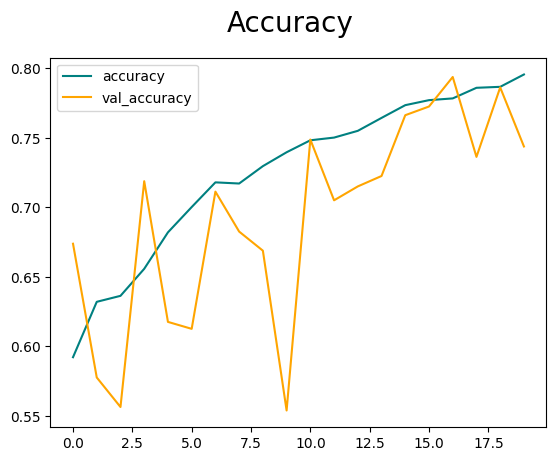

In [31]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color ='teal',label = 'accuracy')
plt.plot(history.history['val_accuracy'], color ='orange',label = 'val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend()
plt.show()

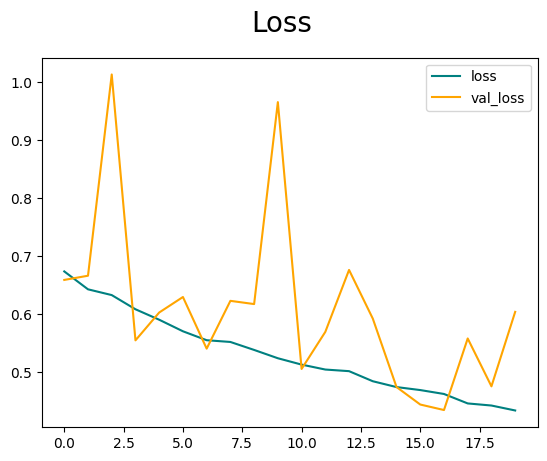

In [32]:
fig = plt.figure()
plt.plot(history.history['loss'], color ='teal',label = 'loss')
plt.plot(history.history['val_loss'], color ='orange',label = 'val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend()
plt.show()

In [35]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [36]:
for batch in test_data.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  precision.update_state(y, yhat)
  recall.update_state(y,yhat)
  accuracy.update_state(y,yhat)

1/1 [==============================] - 0s 376ms/step


In [37]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6540351>

In [38]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.932>

In [39]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7195>

In [40]:
!pip install opencv-python

In [41]:
import cv2

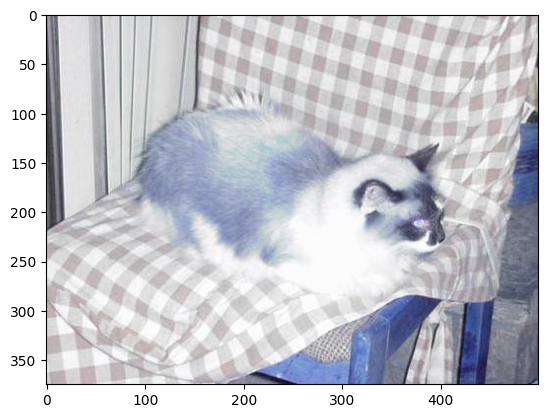

In [72]:
image = cv2.imread('/content/cats-and-dogs-for-classification/cats_dogs/test/cats/cat.4011.jpg')
plt.imshow(image)
plt.show()

In [73]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

In [66]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.10454868, 0.12239487, 0.12972508],
        [0.08293708, 0.10254493, 0.10294321],
        [0.06077785, 0.07662617, 0.09083946],
        ...,
        [0.11517633, 0.12301947, 0.12694104],
        [0.11508885, 0.12293199, 0.12293199],
        [0.1084712 , 0.11631434, 0.11631434]],

       [[0.13378164, 0.13460885, 0.13295443],
        [0.14583454, 0.1497561 , 0.13918625],
        [0.04644811, 0.05022978, 0.04008885],
        ...,
        [0.11233353, 0.12017667, 0.12409823],
        [0.07681251, 0.08465564, 0.08465564],
        [0.08437153, 0.09221467, 0.09221467]],

       [[0.07784244, 0.09207787, 0.09965617],
        [0.16114071, 0.17774814, 0.17374998],
        [0.04631156, 0.06323015, 0.0469498 ],
        ...,
        [0.08509497, 0.09293811, 0.09685968],
        [0.0755188 , 0.08336194, 0.08336194],
        [0.08400735, 0.09185049, 0.09185049]],

       ...,

       [[0.3322961 , 0.469551  , 0.5479824 ],
        [0.33

In [74]:
np.expand_dims(scaled_image,0).shape


(1, 128, 128, 3)

In [75]:
y_hat = model.predict(np.expand_dims(scaled_image,0))

1/1 [==============================] - 0s 19ms/step


In [76]:
y_hat

array([[0.7382129]], dtype=float32)

In [77]:
class_names

['cats', 'dogs']

In [78]:
if y_hat >=0.5:
  print(class_names[1])
else:
    print(class_names[0])

dogs
